# Lab 2: Comparing Means
## w203 Statistics for Data Science

## The Data

The American National Election Studies (ANES) conducts surveys of voters in the United States.  While its flagship survey occurs every four years at the time of each presidential election, ANES also conducts pilot studies midway between these elections.  You are provided with data from the 2018 ANES Pilot Study.

For a glimpse into some of the intricacies that go into the design of this study, take a look at the introduction to the [ANES User's Guide and Codebook](https://electionstudies.org/wp-content/uploads/2019/02/anes_pilot_2018_userguidecodebook.pdf).

It is important to consider the way that the ANES sample was created.  Survery participants are taken from the YouGov panel, which is an online system in which users earn rewards for completing questionnaires.  This feature limits the extent to which results generalize to the U.S. population.

To partially account for differences between the YouGov panel and the U.S. Population, ANES assigns a survey weight to each observation.  This weight estimates the degree to which a citizen with certain observed characteristics is over- or under-represented in the sample.  For the purposes of this assignment, however, you are not asked to use the survey weights.  (For groups with a strong interest in survey analysis, we recommend that you read about R's [survey package](http://r-survey.r-forge.r-project.org/survey/).  We will assign a very small number of bonus points (up to 3) to any group that correctly applies the survey weights and includes a clear explanation of how these work).

In [1]:
A = read.csv("anes_pilot_2018.csv")
anes_data = read.csv("anes_pilot_2018.csv")


Following is an example of a question asked on the ANES survey:

> How difficult was it for you to vote in this last election?

The variable `votehard` records answers to this question, with the following encoding:

- -1 inapplicable, legitimate skip
- 1 Not difficult at all
- 2 A little difficult
- 3 Moderately difficult
- 4 Very difficult
- 5 Extremely difficult


To see the precise form of each question, take a look at the [Questionnaire Specifications](https://electionstudies.org/wp-content/uploads/2018/12/anes_pilot_2018_questionnaire.pdf).

## Assignment

You will use the ANES dataset to address five research questions.  For each question, you will need to operationalize the concepts (selecting appropriate variables and possibly transforming them), conduct exploratory analysis, deal with non-response and other special codes, perform sanity checks, select an appropriate hypothesis test, conduct the test, and interpret your results.  When selecting a hypothesis test, you may choose from the tests covered in the async videos and readings.  These include both paired and unpaired t-tests, Wilcoxon rank-sum test, Wilcoxon signed-rank test, and sign test.  You may select a one-tailed or two-tailed test.

Please organize your response according to the prompts in this notebook.

Note that this is a group lab.  There is a **maximum of three students per team.**
Although you may work on your own, we do not recommend this (we have found that individuals tend to do worse than teams on past labs).

Please limit your submission to 5000 words, not counting code or figures.  We will use some python code like the following to perform the wordcount on your notebook or Rmd file.

```
import nbformat

with open('W203_Lab_2.ipynb') as f:
    nb = nbformat.read(f, as_version=4)
    total_words = 0

    for cell in nb['cells']:
        if cell['cell_type'] == 'markdown':
            total_words += len(cell['source'].split())
    print("Total words:", total_words)
```


## Submission Guidelines
- Submit _one_ report per group.
- Submit *both* your pdf report as well as your source file.
- **Only analyses and comments included in your PDF report will be considered for grading.**
- Include names of group members on the front page of the submitted report.
- Naming structure of submitted files:
    - PDF report: [student_surname_1]\_[student_surname_2][\_*]\_lab\_2.pdf
    - Jupyter Notebook: [student_surname_1]\_[student_surname_2][\_*]\_lab\_2.ipynb


# Research Questions

<font color=blue>

- The mission of the American National Election Studies (ANES) is to advance the scientific study of public opinion and political behavior.  They accomplish this by developing and employing surveys that measure many variables and support rich hypothesis testing to assess voter turnout and vote choice.  The origins of their analysis started with a nation opinion survey conducted at the University of Michigan's Survey Research Center with the 1948 presidential election.  They continued to conduct surveys in every presidential election year through 2004.  In 2006, Stanford University's Institute for Research in the Social Sciences and the University of Michigan's Institute for Social Research developed a partnership which maintains and evolves the ANES.

- Through the decades, Time Series studies conducted before and after presidential elections represent the focus of ANES studies.  Typically collection occurs via face-to-face interviews with respondents in their homes.  Pilot Studies are used to test and refine new questions for the Time Series.  These supporting studies are conducted telephonically.  The data assessed in this lab is from the 2018 Pilot Study.


</font>

## Question 1: Do US voters have more respect for the police or for journalists?

### Introduce your topic briefly.  (5 points)
Explain how your variables are operationalized.  Comment on any gaps that you can identify between your operational definitions and the concepts you are trying to study.

<font color=blue>


__Overview__

Within the ANES pilot questions, two specific ones directly support the posed question:

  - How would you rate the police?
  - How would you rate journalists?
  
The respondents are required to rate their feelings on the topic using a 0-100 scale based on a _FEELING THERMOMETER_ 

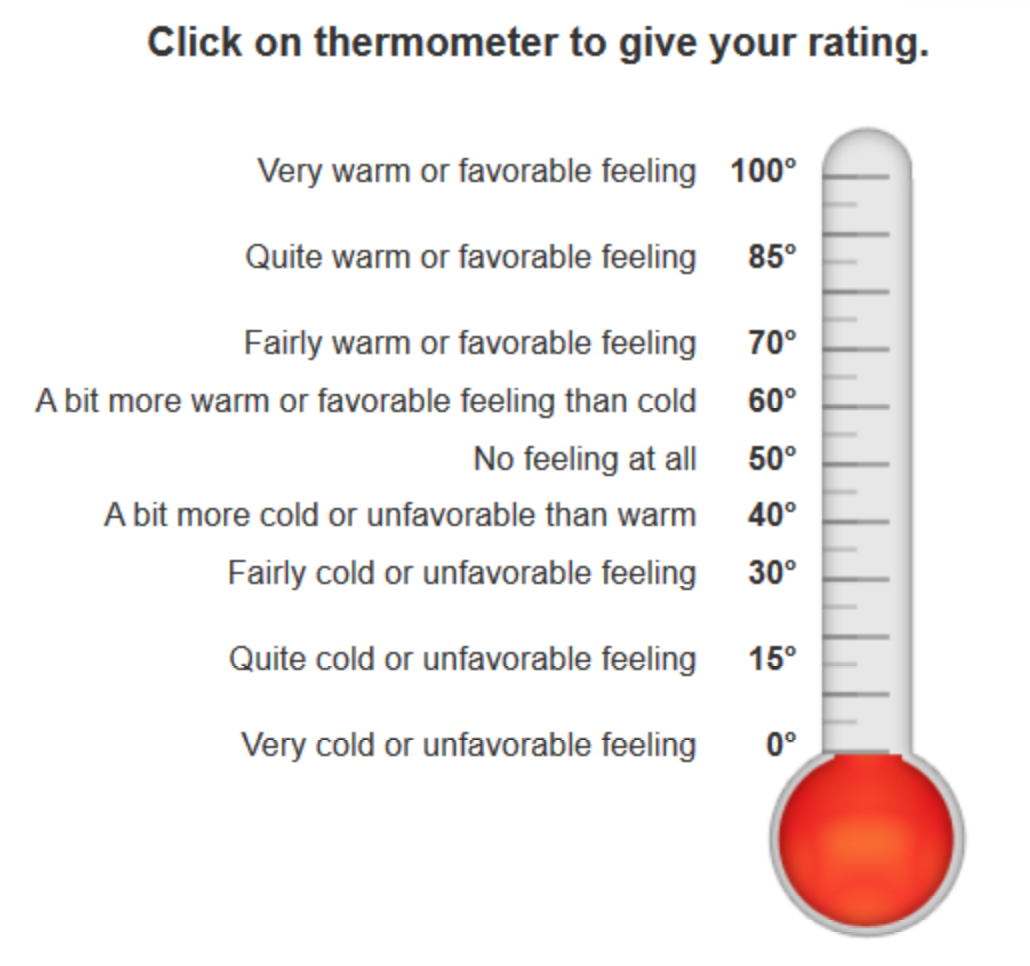

As seen from the image, the ratings are not strictly a metric scale, they are ordinal in nature, but we choose to operationalize them as metric variables for the purpose of analyzing Q1



The context of these questions was in 'feeling thermometers' which have a numerical range from 0 too 100.
</font>

### Perform an exploratory data analysis (EDA) of the relevant variables. (5 points)
This should include a treatment of non-response and other special codes, basic sanity checks, and a justification for any values that are removed.  Use visual tools to assess the relationship among your variables and comment on any features you find.

<font color=blue>

__Initial Assessment__

```{r}
press = anes_data$ftjournal
police = anes_data$ftpolice
press_range = range(anes_data$ftjournal) # [-7,100]
police_range = range(anes_data$ftpolice) # [0,100]
```

- Values existed for all respondents for these two questions.  The expected range of the data for each of these survey questions is [0,100].  The police data meets this criteria; however, the press data does not.  
- This question possesses negative values, which indicates these was no respondent answer.  To prevent the results from being skewed by these values, the responses associated with those respondents were not included in the analysis.  Using this approach, the overall number of respondents reduced by 2.

```{r}
valid_responses = subset(anes_data,  anes_data$ftjournal >= 0 & anes_data$ftpolice >= 0)
trust_data = data.frame(police = valid_responses$ftpolice, press = valid_responses$ftjournal)
```


</font>

In [16]:
# Initial assessment to check the range of values

press = anes_data$ftjournal
police = anes_data$ftpolice
press_range = range(anes_data$ftjournal) # [-7,100]
police_range = range(anes_data$ftpolice) # [0,100]

# Curtailing the data set to only include the valid responses
valid_responses = subset(anes_data,  anes_data$ftjournal >= 0 & anes_data$ftpolice >= 0)
trust_data = data.frame(police = valid_responses$ftpolice, press = valid_responses$ftjournal)



### Based on your EDA, select an appropriate hypothesis test.  (5 points)
Explain why your test is the most appropriate choice.  List and evaluate all assumptions for your test.

<font color=blue>

The final data set analysed possessed data from 2498 respondents with values from 0 to 100 for both the press and police questions. 

![Journalist Police Trust](journalist_police_trust.png)

Though the data is numerical in nature, indivduals will use different scales when assessing their relative values on the thermometer.  Consequently, a strictly linear relationship cannot be assumed to exist between the values.  This data feature supports the use of a non-parametric hypothesis test - namely the Wilcoxon Rank-Sum Test.  Employing the Hypothesis of Means for $H_O$ for this analysis capitalizes on the metric scale that the thermometer context provides.  For this question, the hypotheses tested were:

  - Null:  The means of the two groups is the same. $H_0:  E(Press) = E(Police)$
  - Alternative:  The means of the two groups are not the same.  $H_A:  E(Press) \neq E(Police)$

</font>

### Conduct your test. (5 points)
Explain (1) the statistical significance of your result, and (2) the practical significance of your result.  Make sure you relate your findings to the original research question.

<font color=blue>

__Analysis__



```{r}
wilcox.test(trust_data$police, trust_data$press, paired = TRUE, mu = 0, conf.level = 0.95)
``` 


__Outcome.__ 
  - Statistical Signficance. The p-value obtained from the Wilcoxon rank-sum test supports rejecting the null hypotheses - namely that there is no translation in the distributions of public opinion of the police and the press.
  - Practical Significance.  Spearman's rank correlation coefficient represents an effective way to assess the practical significance of the police and press analysis.  It provides a non-parametric measure of rank correlation, which aligns to the hypothesis test.

```{r}
cor(trust_data$police, trust_data$press, method = "spearman")
```
- The values for Spearman's Rank-Order Correlation, $r_s$, can take on the values from $+1$ to $-1$.  $r_s$ has the following associations:\
  - $+1$:  perfect association of ranks\
  - $0$:   no association between the ranks\
  - $-1$:  perfet negative association of ranks.

The $r_s$ value obtained from this test was -0.123.  This indicates a weak _practical effect_ for the negative correlation between the public opinion of the press and the police.



</font>

In [17]:
#Analysis of Statistical Signficance.
wilcox.test(trust_data$police, trust_data$press, paired = TRUE, mu = 0, conf.level = 0.95)

# The p-value obtained from the Wilcoxon rank-sum test supports rejecting the null hypotheses - namely that there is no translation in the distributions of public opinion of the police and the press.
#Practical Significance. 

#Spearman's rank correlation coefficient represents an effective way to assess the practical significance of the police and press analysis. 
#Spearman's correlation provides a non-parametric measure of rank correlation for non-metric variables, which aligns to the hypothesis test.
spearman_cor = cor(trust_data$police, trust_data$press, method = "spearman")

cat(sprintf("\n The Spearman's correlations is: %f \n", spearman_cor))





	Wilcoxon signed rank test with continuity correction

data:  trust_data$police and trust_data$press
V = 1857100, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



 The Spearman's correlations is: -0.123176 


## Question 2: Are Republican voters older or younger than Democratic voters?

### Introduce your topic briefly.  (5 points)
Explain how your variables are operationalized.  Comment on any gaps that you can identify between your operational definitions and the concepts you are trying to study.

<font color=blue>

__Overview.__
    
Two entries within the survey directly support establishing a frame for this question.  These two questions are:
- What year were you born?
- Generally speaking, do you usually think of yourself as a Democrat, a Republican, an Independent, or what?

Together, these questions, along with the assmption that surveyed individuals provided truthful data for these questions, creates an informed approach to answering which party has older voters.  The age of the respondent is a numberical value, and their party affiliation is categorical.  
</font>

### Perform an exploratory data analysis (EDA) of the relevant variables. (5 points)
This should include a treatment of non-response and other special codes, basic sanity checks, and a justification for any values that are removed.  Use visual tools to assess the relationship among your variables and comment on any features you find.

<font color=blue>

 Assumptions needed for this analysis include:
  - Metric scale.  The age data meets this assumption.
  - Each value pair is drawn independent of other pairs from the same distribution.
  - The two variables have the same distribution, just with some potential shift.


```{r}
partisans = anes_data[which(anes_data$pid1d ==c(1,2)),] # 1 = democrat, 2 = republican
age = 2018 - partisans$birthyr
party = partisans$pid1d
partisanAge = data.frame(age, party)
```

![All Respondents](q2_all_respondents_age.png)



</font>

In [18]:
partisans = anes_data[which(anes_data$pid1d ==c(1,2)),] # 1 = democrat, 2 = republican
age = 2018 - partisans$birthyr
party = partisans$pid1d
partisanAge = data.frame(age, party)


### Based on your EDA, select an appropriate hypothesis test.  (5 points)
Explain why your test is the most appropriate choice.  List and evaluate all assumptions for your test.

<font color=blue>


__Initial Assessment.__

This type of data supports using the independent sample t-test.  One set of data is numberical (respondents' ages), and the other is categorical (Republican or Democrat). With this test, we conducted a comparison of means.  The hypotheses being tested were:
 - $H_0: E(Republicans Age) = E(Democrats Age)$.
 - $H_A: E(Republicans Age) \neq E(Democrats Age)$
 


</font>

### Conduct your test. (5 points)
Explain (1) the statistical significance of your result, and (2) the practical significance of your result.  Make sure you relate your findings to the original research question.

<font color=blue>


__Analysis.__

```{r}
t.test(age ~ party, data = partisanAge)
```
Statistical signifcance.  The high p-value from this test, 0.547 indicates that the null hypothesis cannot be rejected.  

Practical significance.  The Cohen's d test supports determining the effect size for the analysis.  With this test, the outcome value (d = -0.06) indicates that there is only a small effect present with this test.  

```{r}
library(effsize)
cohen.d(age ~ party, data = partisanAge)
```

Thus far, we have only addressed individuals who identified themselves as either Republicans or Democrats.  What has yet to be addressed is whether they voted.  One of the survey questions captures whether respondents voted in the election held the month prior (November 2018).  Integrating this criteria into the dataset gives some further insights into party voters.

![Voted Age Distribution](q2_voters_age.png)

```{r}
partisansVoted = partisans[which(partisans$turnout18 == c(1,2,3)),]
t.test(2018 - partisansVoted$birthyr ~ partisansVoted$pid1d, data = partisansVoted)
```

__Outcome.__

Including the constraint of having voted in the previous month's election conveys a distinctly different picture.  The p-value no longer supports not rejecting the null hypothesis.  The data does not support that the difference in means is zero.  A point of note is that for the Democrats, the average age between the two scenarios stayed quite constant (51.7 and 51.1).  However, for the Republicans, the average age of those that voted in the November election was 8 years older than Republicans at large from the survey.

```{r}
library(effsize)
cohen.d(2018 - partisansVoted$birthyr ~ partisansVoted$pid1d, data = partisansVoted)
```

Re-assessing the practical significance of the results on the adjusted dataset with the Cohen's d test now indicates a medium effect size.  These results indicate that the average age of Democrats at large in the survey and those that voted in the November 2018 election are consistent.  However, Republicans that voted in the November 2018 election are on average 8 years older than Republicans at large in the survey.



</font>

## Question 3: Do a majority of independent voters believe that the federal investigations of Russian election interference are baseless?

### Introduce your topic briefly.  (5 points)
Explain how your variables are operationalized.  Comment on any gaps that you can identify between your operational definitions and the concepts you are trying to study.

<font color=blue>

__Overview.__
    
Two entries within the survey directly support establishing a frame for this question:

- Do you think the Russian government probably interfered in the 2016 presidential election to try to help Donald Trump win, or do you think this probably did not happen?(__russia16__)

- Do you think Donald Trump’s 2016 campaign probably coordinated with the Russians, or do you think his campaign probably did not do this? (__coord16__)


Both variables are  categorical and filtering for the opinions of the independents within the dataset willl allow us to answer the question

 __Do a majority of independent voters believe that the federal investigations of Russian election interference are baseless?__
 
 We could further explore an additional question, to get more insights into the results
 
 - Do you approve, disapprove, or neither approve nor disapprove of Robert Mueller’s investigation of Russian interference in the 2016 election?(__muellerinv__)



</font>

### Perform an exploratory data analysis (EDA) of the relevant variables. (5 points)
This should include a treatment of non-response and other special codes, basic sanity checks, and a justification for any values that are removed.  Use visual tools to assess the relationship among your variables and comment on any features you find.

__Initial Assessment.__

```{r}
q3 <- data.frame(anes_data$pid1d, anes_data$turnout18, anes_data$russia16, anes_data$coord16)
colnames(q3) <- c("party", "voted", "russia_1", "russia_2")
q3<- q3[which(q3$party == c(3)),] # isolate independent voters
q3<- q3[which(q3$voted == c(1,2,3)),] # isolated those who voted in 2018
# head(q3_v1)
```

In [55]:
q3 <- data.frame(anes_data$pid1d, anes_data$turnout18, anes_data$russia16, anes_data$muellerinv, anes_data$coord16)
colnames(q3) <- c("party", "voted", "russia16", "muellerinv","coord16" )
#summary(q3)
independents = q3[which(q3$party==c(3)),] # 356 independents in the data set


nrow(independents)
summary(independents)


[1] 356

     party       voted          russia16       muellerinv       coord16     
 Min.   :3   Min.   :1.000   Min.   :1.000   Min.   :1.000   Min.   :1.000  
 1st Qu.:3   1st Qu.:1.000   1st Qu.:1.000   1st Qu.:1.000   1st Qu.:1.000  
 Median :3   Median :3.000   Median :1.000   Median :4.000   Median :2.000  
 Mean   :3   Mean   :2.677   Mean   :1.463   Mean   :3.654   Mean   :1.517  
 3rd Qu.:3   3rd Qu.:4.000   3rd Qu.:2.000   3rd Qu.:6.000   3rd Qu.:2.000  
 Max.   :3   Max.   :5.000   Max.   :2.000   Max.   :7.000   Max.   :2.000  

### Based on your EDA, select an appropriate hypothesis test.  (5 points)
Explain why your test is the most appropriate choice.  List and evaluate all assumptions for your test.

<font color=blue>


__Initial Assessment.__

The hypotheses being tested:

  - Null: # of Independents who believe russia interfered in the elections is 50%. $H_0: E(Russia  Interference) = 0.5$
  - Alternative:  # of Independents who believe russia interfered in the elections is != 50%. $H_0: E(Russia  Interference) \neq 0.5$.  



</font>

### Conduct your test. (5 points)
Explain (1) the statistical significance of your result, and (2) the practical significance of your result.  Make sure you relate your findings to the original research question.

In [54]:
Russian_interference = independents$russia16 == 1
# mean(Russian_interference)
# sd(Russian_interference)
Russian_coord= independents$coord16 == 1
sum(independents$russia16 == 1 & independents$coord16 == 1)


t.test(Russian_interference, mu =0.5)
t.test(Russian_coord, mu =0.5)

[1] 160


	One Sample t-test

data:  Russian_interference
t = 1.3797, df = 355, p-value = 0.1685
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4844663 0.5885675
sample estimates:
mean of x 
0.5365169 



	One Sample t-test

data:  Russian_coord
t = -0.63547, df = 355, p-value = 0.5255
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4309858 0.5353064
sample estimates:
mean of x 
0.4831461 


## Question 4: Was anger or fear more effective at driving increases in voter turnout from 2016 to 2018?

### Introduce your topic briefly.  (5 points)
Explain how your variables are operationalized.  Comment on any gaps that you can identify between your operational definitions and the concepts you are trying to study.

### Perform an exploratory data analysis (EDA) of the relevant variables. (5 points)
This should include a treatment of non-response and other special codes, basic sanity checks, and a justification for any values that are removed.  Use visual tools to assess the relationship among your variables and comment on any features you find.

### Based on your EDA, select an appropriate hypothesis test.  (5 points)
Explain why your test is the most appropriate choice.  List and evaluate all assumptions for your test.

### Conduct your test. (5 points)
Explain (1) the statistical significance of your result, and (2) the practical significance of your result.  Make sure you relate your findings to the original research question.

## Question 5: Select a fifth question that you believe is important for understanding the behavior of voters

### Clearly argue for the relevance of this question.  (10 points)
In words, clearly state your research question and argue why it is important for understanding the recent voting behavior. Explain it as if you were presenting to an audience that includes technical and non technical members.

Explain how your variables are operationalized.  Comment on any gaps that you can identify between your operational definitions and the concepts you are trying to study.

### Perform EDA and select your hypothesis test (5 points)

Perform an exploratory data analysis (EDA) of the relevant variables.

This should include a treatment of non-response and other special codes, basic sanity checks, and a justification for any values that are removed.  Use visual tools to assess the relationship among your variables and comment on any features you find.

Based on your EDA, select an appropriate hypothesis test.
Explain why your test is the most appropriate choice.  List and evaluate all assumptions for your test.

### Conduct your test. (2 points)
Explain (1) the statistical significance of your result, and (2) the practical significance of your result.

### Conclusion (3 points)
Clearly state the conclusion of your hypothesis test and how it relates to your research question.

Finally, briefly present your conclusion in words as if you were presenting to an audience that includes technical and non technical members.